In [1]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

40.88128373795226 -178.00902592728278
74.41182469695914 167.36507557114487
-88.42078242325775 -47.15394871483838
-61.17698275440889 -64.18512959158181
-66.24305284075356 91.36074242801766
21.387598939372083 -31.108628687308823
-80.300172709267 72.99673516219698
86.27347959567467 -14.282196282082538
3.3815278549696473 119.94256812240263
-14.164129169779443 96.57159382860226
84.98652772345847 59.03611519953654
81.08771460043218 147.02449155608673
-66.3117739676868 -136.77864255954987
41.63328501643559 47.23958646554837
83.63969327121686 -49.781836930749336
-53.76108931677864 124.41927977847604
80.12623806482804 92.46720999843336
22.16231632076628 -85.05199141722007
10.785974262477083 16.45928315156982
32.03423985131434 101.41297589985385
64.65253876447056 -97.99740081435301
51.06900057813982 -32.88125421687758
35.39662314292869 -144.24093265824422
10.963897534153276 75.6958310695793
71.6934721378774 46.30439372360814
53.50968546326263 -72.17368080945302
32.22375817601075 151.114040524308

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.

len(cities)

604

In [7]:
# Import the time library and the datetime module from the datetime library 

import time
from datetime import datetime

In [8]:
# Import the requests library.

import requests

# Import the API key.

from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b61e5efacc42e3559cf36db1e366e2cd


In [10]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")

print("-----------------------------")

# Create counters.

record_count = 1
set_count = 1

# Loop through all the cities in the list.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    
    record_count += 1
    
    # Run an API request for each of the cities.
    
    try:
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.

    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | provideniya
Processing Record 2 of Set 1 | pevek
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | ponta do sol
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | ligayan
Processing Record 9 of Set 1 | bengkulu
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | rutul
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | talnakh
Processing Record 17 of Set 1 | mantua
Processing Record 18 of Set 1 | bousso
Processing Record 19 of Set 1 | yaan
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | lagoa
Pr

Processing Record 41 of Set 4 | omboue
Processing Record 42 of Set 4 | east london
Processing Record 43 of Set 4 | am timan
Processing Record 44 of Set 4 | nikolskoye
Processing Record 45 of Set 4 | bay roberts
Processing Record 46 of Set 4 | beira
Processing Record 47 of Set 4 | aykhal
Processing Record 48 of Set 4 | oistins
Processing Record 49 of Set 4 | san jose
Processing Record 50 of Set 4 | tunduma
Processing Record 1 of Set 5 | tiksi
Processing Record 2 of Set 5 | rio cuarto
Processing Record 3 of Set 5 | andevoranto
City not found. Skipping...
Processing Record 4 of Set 5 | saint george
Processing Record 5 of Set 5 | goma
Processing Record 6 of Set 5 | abu kamal
Processing Record 7 of Set 5 | kavaratti
Processing Record 8 of Set 5 | portland
Processing Record 9 of Set 5 | lufilufi
Processing Record 10 of Set 5 | samarai
Processing Record 11 of Set 5 | humaita
Processing Record 12 of Set 5 | cidreira
Processing Record 13 of Set 5 | safford
Processing Record 14 of Set 5 | bantin

Processing Record 30 of Set 8 | vestmannaeyjar
Processing Record 31 of Set 8 | churapcha
Processing Record 32 of Set 8 | lavrentiya
Processing Record 33 of Set 8 | platanos
Processing Record 34 of Set 8 | hutang
Processing Record 35 of Set 8 | princeton
Processing Record 36 of Set 8 | saleaula
City not found. Skipping...
Processing Record 37 of Set 8 | belyy yar
Processing Record 38 of Set 8 | owando
Processing Record 39 of Set 8 | karratha
Processing Record 40 of Set 8 | necochea
Processing Record 41 of Set 8 | plouzane
Processing Record 42 of Set 8 | san rafael
Processing Record 43 of Set 8 | ahuimanu
Processing Record 44 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 45 of Set 8 | chicama
Processing Record 46 of Set 8 | conselheiro lafaiete
Processing Record 47 of Set 8 | maceio
Processing Record 48 of Set 8 | gravdal
Processing Record 49 of Set 8 | grand gaube
Processing Record 50 of Set 8 | iqaluit
Processing Record 1 of Set 9 | maumelle
Processing Record 2 o

Processing Record 18 of Set 12 | tiznit
Processing Record 19 of Set 12 | vrangel
Processing Record 20 of Set 12 | sinjah
City not found. Skipping...
Processing Record 21 of Set 12 | wajir
Processing Record 22 of Set 12 | sao paulo de olivenca
Processing Record 23 of Set 12 | iracoubo
Processing Record 24 of Set 12 | ust-nera
Processing Record 25 of Set 12 | namtsy
Processing Record 26 of Set 12 | oksfjord
Processing Record 27 of Set 12 | baishishan
Processing Record 28 of Set 12 | oriximina
Processing Record 29 of Set 12 | trail
Processing Record 30 of Set 12 | mocambique
City not found. Skipping...
Processing Record 31 of Set 12 | praia da vitoria
Processing Record 32 of Set 12 | drovyanaya
Processing Record 33 of Set 12 | satitoa
City not found. Skipping...
Processing Record 34 of Set 12 | taltal
Processing Record 35 of Set 12 | maragogi
Processing Record 36 of Set 12 | rivne
Processing Record 37 of Set 12 | gimli
Processing Record 38 of Set 12 | quatre cocos
Processing Record 39 of 

In [11]:
len(city_data)

561

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.3833,-173.3000,46.51,100,100,11.18,RU,2022-08-23 23:49:47
1,Pevek,69.7008,170.3133,43.68,85,100,1.99,RU,2022-08-23 23:48:29
2,Ushuaia,-54.8000,-68.3000,40.66,81,20,4.61,AR,2022-08-23 23:48:34
3,Busselton,-33.6500,115.3333,49.26,75,99,11.72,AU,2022-08-23 23:48:14
4,Ponta Do Sol,32.6667,-17.1000,72.23,70,1,4.38,PT,2022-08-23 23:49:55
5,Ligayan,4.6533,119.4706,82.98,76,97,9.48,PH,2022-08-23 23:53:59
6,Bengkulu,-3.8004,102.2655,74.43,90,83,3.49,ID,2022-08-23 23:52:10
7,Chokurdakh,70.6333,147.9167,42.10,83,100,12.03,RU,2022-08-23 23:48:36
8,Rikitea,-23.1203,-134.9692,71.13,66,60,14.18,PF,2022-08-23 23:48:05
9,Rutul,41.5357,47.4239,57.47,53,5,4.70,RU,2022-08-23 23:54:00


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Provideniya,RU,2022-08-23 23:49:47,64.3833,-173.3000,46.51,100,100,11.18
1,Pevek,RU,2022-08-23 23:48:29,69.7008,170.3133,43.68,85,100,1.99
2,Ushuaia,AR,2022-08-23 23:48:34,-54.8000,-68.3000,40.66,81,20,4.61
3,Busselton,AU,2022-08-23 23:48:14,-33.6500,115.3333,49.26,75,99,11.72
4,Ponta Do Sol,PT,2022-08-23 23:49:55,32.6667,-17.1000,72.23,70,1,4.38
5,Ligayan,PH,2022-08-23 23:53:59,4.6533,119.4706,82.98,76,97,9.48
6,Bengkulu,ID,2022-08-23 23:52:10,-3.8004,102.2655,74.43,90,83,3.49
7,Chokurdakh,RU,2022-08-23 23:48:36,70.6333,147.9167,42.10,83,100,12.03
8,Rikitea,PF,2022-08-23 23:48:05,-23.1203,-134.9692,71.13,66,60,14.18
9,Rutul,RU,2022-08-23 23:54:00,41.5357,47.4239,57.47,53,5,4.70


In [15]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

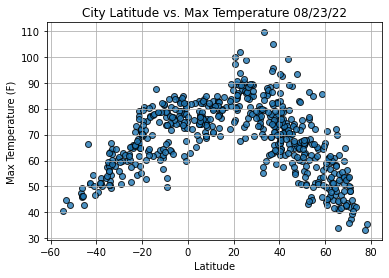

In [17]:
# Import time module

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig1.png")

# Show plot.

plt.show()

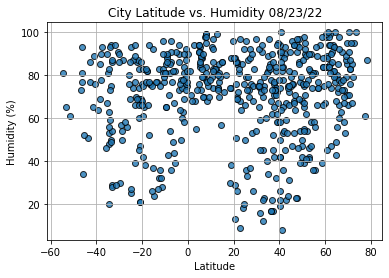

In [18]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

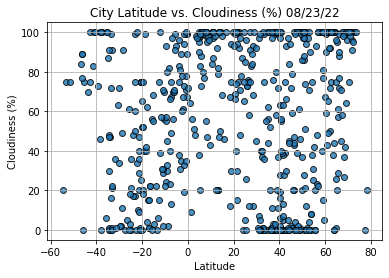

In [19]:
# Build the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

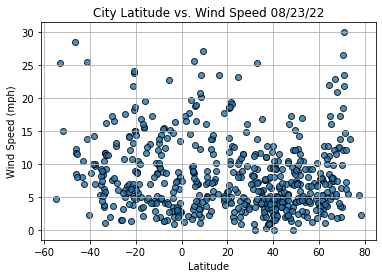

In [20]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()